In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_json('transportations.json.gz', lines=True)
# data = data.groupby('timestamp').count()
data

,lat,lon,timestamp,amenity,name,tags
0,49.207282,-123.140193,2019-05-29T17:48:57.000-07:00,fuel,Shell,"{'brand:wikidata': 'Q154950', 'wheelchair': 'y..."
1,49.225209,-122.990745,2011-09-12T20:50:58.000-07:00,parking,NaN,{'parking': 'underground'}
2,49.106010,-122.826168,2011-09-15T01:16:56.000-07:00,parking,NaN,{'parking': 'underground'}
3,49.264041,-123.153407,2019-03-22T02:46:36.000-07:00,fuel,Shell,"{'addr:housenumber': '2103', 'website': 'https..."
4,49.082281,-122.056130,2018-02-12T01:42:34.000-08:00,fuel,Petro-Canada,{'name:en': 'Petrol Canada'}
...,...,...,...,...,...,...
2253,49.266379,-123.251348,2010-12-14T21:16:16.000-08:00,bicycle_parking,NaN,{'capacity': '14'}
2254,49.266264,-123.251247,2010-12-14T21:16:16.000-08:00,bicycle_parking,NaN,{'capacity': '14'}
2255,49.349022,-122.616273,2010-12-18T15:12:40.000-08:00,parking,NaN,{}
2256,49.276443,-122.790138,2013-03-26T23:45:50.000-07:00,parking,NaN,{}


In [3]:
fuel_bus = data[(data['amenity'] == 'fuel')] #| (data['amenity'] == 'bus_station')]
# fuel = data[(data['amenity'] == 'fuel')| (data['amenity'] == 'bus_station')]
fuel_bus = fuel_bus[fuel_bus['name'].notnull()]
print(fuel_bus.count())

lat          185
lon          185
timestamp    185
amenity      185
name         185
tags         185
dtype: int64


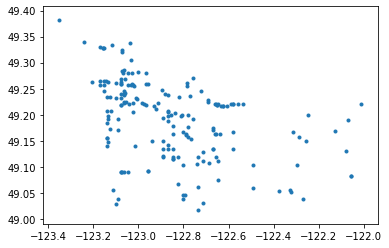

In [4]:
plt.scatter(fuel_bus['lon'], fuel_bus['lat'], marker='.');

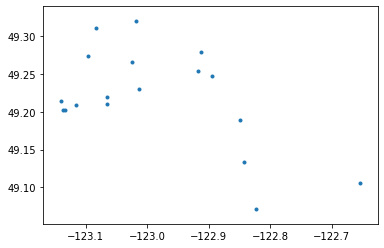

In [5]:
schools = data[data['amenity'] == 'bus_station']
plt.scatter(schools['lon'], schools['lat'], marker='.');

,lat,lon,timestamp,amenity,name,tags
5,49.265864,-123.242610,2008-08-21T00:26:55.000-07:00,bicycle_parking,NaN,{'created_by': 'Potlatch 0.10b'}
17,49.049100,-122.288839,2018-04-30T13:17:03.000-07:00,bicycle_parking,NaN,"{'bicycle_parking': 'rack', 'covered': 'no', '..."
29,49.267307,-123.104332,2016-08-20T04:15:38.000-07:00,bicycle_parking,NaN,{}
30,49.267301,-123.103988,2016-08-20T04:15:39.000-07:00,bicycle_parking,NaN,{}
31,49.267283,-123.103051,2016-08-20T04:15:40.000-07:00,bicycle_parking,NaN,{}
...,...,...,...,...,...,...
2240,49.266690,-123.005419,2019-07-18T05:05:28.000-07:00,bicycle_parking,NaN,{}
2249,49.211556,-122.922899,2010-11-23T03:03:39.000-08:00,bicycle_parking,NaN,{}
2253,49.266379,-123.251348,2010-12-14T21:16:16.000-08:00,bicycle_parking,NaN,{'capacity': '14'}
2254,49.266264,-123.251247,2010-12-14T21:16:16.000-08:00,bicycle_parking,NaN,{'capacity': '14'}


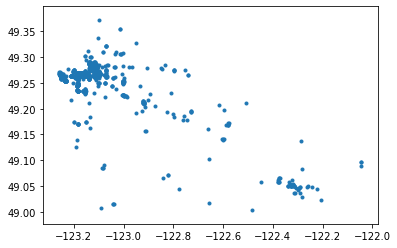

In [35]:
bike_and_parking = data[(data['amenity'] == 'bicycle_parking')]

bike_and_parking = bike_and_parking[bike_and_parking['name'].isnull()]
plt.scatter(bike_and_parking['lon'], bike_and_parking['lat'], marker='.');
# bike_and_parking['timestamp'] = pd.to_datetime(bike_and_parking['timestamp'], format='%m/%d/%Y')
check = bike_and_parking.timestamp.str.split("T") 
# bike_and_parking['timestamp'] = bike_and_parking.timestamp.str.split(",")
# bike_and_parking['timestamp'] = pd.to_datetime(bike_and_parking['timestamp'], format='%m/%d/%Y')
bike_and_parking